<a href="https://colab.research.google.com/github/LeibGit/-DI_Bootcamp/blob/main/ExercisesXP_Heart_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises XP - Heart Disease Prediction (Student, Hints Only)

## What you will learn
- Load and inspect CSV data
- EDA and preprocessing
- Train Logistic Regression, SVM, XGBoost
- Hyperparameter tuning with GridSearchCV
- Evaluate with standard metrics

## What you will create
- Working classifiers and a simple comparison report


## Setup

In [21]:
!pip install
import os, zipfile, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost
# Hint: install xgboost in Colab if missing
# !pip install xgboost
try:
    from xgboost import XGBClassifier
except Exception:
    XGBClassifier = None

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


ERROR: You must give at least one requirement to install (see "pip help install")


## Exercise 1 - Exploratory Data Analysis

In [22]:
csv_path = "dataset_heart.csv"

# TODO: load the CSV into a DataFrame named df
df = pd.read_csv(csv_path)

# TODO: inspect df
print(df.info())
print(df.describe())
print(df.head())
print(df.columns)


# TODO: identify target column
target = df['heart disease']

# TODO: split features and target
X = df.loc[:, 'age': 'thal']
y = target

# TODO: train test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
# Hint: train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

### Basic visual checks

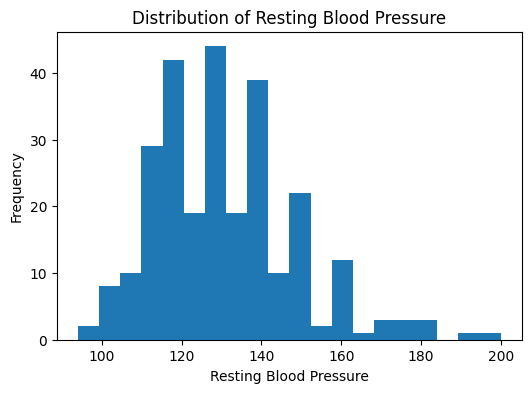

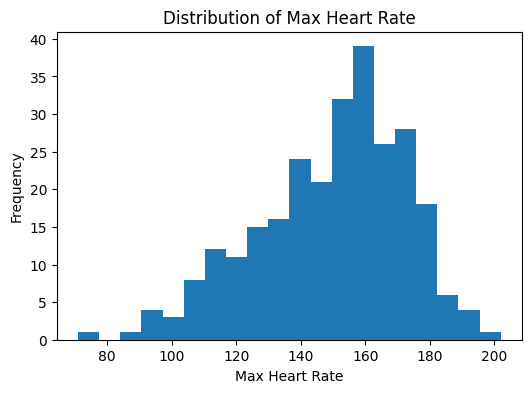

In [23]:
# TODO: pick a few numeric columns and plot histograms
resting_blood_pressure = df['resting blood pressure']
max_heart_rate = df['max heart rate']


# TODO: plot class balance as a bar chart
plt.figure(figsize=(6,4))
plt.hist(df['resting blood pressure'], bins=20)
plt.title("Distribution of Resting Blood Pressure")
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Frequency")
plt.show()

# Histogram for max heart rate
plt.figure(figsize=(6,4))
plt.hist(df['max heart rate'], bins=20)
plt.title("Distribution of Max Heart Rate")
plt.xlabel("Max Heart Rate")
plt.ylabel("Frequency")
plt.show()


## Preprocessing pipeline

In [24]:
from pandas.core.arrays import categorical
cat_cols = df.select_dtypes(include=['category', 'bool'])
num_cols = df.select_dtypes(include=['int64', 'float64'])

# TODO: build a ColumnTransformer named pre

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)



## Helper - evaluation function

In [25]:
def eval_and_report(name, model, X_test, y_test):
    """Compute metrics and draw confusion matrix and ROC if available.
    Fill in the missing parts.
    """
    # TODO: predictions
    y_pred = model.predict(X_test)

    # TODO: compute metrics dict with accuracy, precision, recall, f1
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
    }
    print(name, metrics)

    # TODO: confusion matrix plot
    # Hint: confusion_matrix(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()
    # Draw with plt.imshow or ConfusionMatrixDisplay

    # TODO: ROC curve if model has predict_proba
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return metrics


## Exercise 2 - Logistic Regression without Grid Search

In [26]:
# TODO: create a Pipeline with your preprocessor and LogisticRegression
# Hint: solver 'liblinear' is fine, increase max_iter if needed
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# TODO: fit on training data
# pipe_lr.fit(...)
pipe_lr.fit(X_train, y_train)
# TODO: evaluate with eval_and_report
y_pred = pipe_lr.predict(X_test)
lr_no_gs_metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
    }


## Exercise 3 - Logistic Regression with Grid Search

In [27]:
# TODO: build a Pipeline same as above
pipe_lr_cv = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# TODO: define param_grid for lr__C and lr__penalty
# Hint: use small to large C values. 'liblinear' supports 'l1' and 'l2'.
param_grid = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'lr__penalty': ['l1', 'l2'],
}

# TODO: GridSearchCV with cv=5 and scoring='f1'
grid_lr = GridSearchCV(
  estimator=pipe_lr_cv,
  param_grid=param_grid,
  cv=5,
  scoring='f1'
)
grid_lr.fit(X_train, y_train)
print('Best params:', grid_lr.best_params_)
best_lr = grid_lr.best_estimator_
lr_gs_metrics = eval_and_report('LR grid', best_lr, X_test, y_test)


ValueError: Invalid parameter 'lr' for estimator Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(max_iter=1000))]). Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose'].

## Exercise 4 - SVM without Grid Search

In [ ]:
# TODO: choose kernel and hyperparameters for SVC
# Hint: try kernel='rbf' with C=1.0 and gamma='scale'
svm = SVC(kernel='rbf', C=1.0, gamma='scale')

pipe_svm = Pipeline([
    ('prep', pre),
    ('svm', svm)
])

pipe_svm.fit(X_train, y_train)
svm_no_metrics = eval_and_report('SVM no grid', pipe_svm, X_test, y_test)

## Exercise 5 - SVM with Grid Search

In [ ]:
# TODO: Pipeline with SVC(probability=True) so you can plot ROC
pipe_svm_cv = Pipeline([
    ('prep', preprocess),
    ('svm', SVC(probability=True))
])

# TODO: param_grid with svm__kernel, svm__C, svm__gamma
svm_param_grid = {
    'svm__kernel': ['rbf','linear'],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale','auto'],
}

# TODO: GridSearchCV, fit, evaluate best estimator
grid_svm = GridSearchCV(
    estimator=pipe_svm_cv,
    param_grid=svm_param_grid,
    cv=5,
    scoring='f1'
)
best_svm = grid_svm.best_estimator_
svm_gs_metrics = eval_and_report('SVM grid', best_svm, X_test, y_test)


## Exercise 6 - XGBoost without Grid Search

In [ ]:
# TODO: build an XGBClassifier and wrap it in a Pipeline with pre
# Hint: start with n_estimators around 300, learning_rate 0.1, max_depth 3 to 5
pipe_xgb = Pipeline([
    ('prep', preprocess),
    ('xgb', xgb)
])
pipe_xgb.fit(X_train, y_train)
xgb_no_metrics = eval_and_report('XGB no grid', pipe_xgb, X_test, y_test)


## Exercise 7 - XGBoost with Grid Search

In [ ]:
# TODO: Pipeline with XGBClassifier
pipe_xgb_cv = None

# TODO: define a reasonable param_grid
xgb_param_grid = {
    n_estimators=300,
    learning_rate=0.1,
    max_depth=3,
    objective="binary:logistic",
    eval_metric='logloss'
}

# TODO: GridSearchCV, fit, evaluate best estimator
grid_xgb = None
best_xgb = grid_xgb.best_estimator_
xgb_gs_metrics = eval_and_report('XGB grid', best_xgb, X_test, y_test)


## Compare models

In [ ]:
# TODO: build a comparison DataFrame from your metrics dicts
# Hint: pd.DataFrame.from_dict(metrics, orient='index')
summary = {
  lr_no_gs_metrics,      # Logistic Regression without grid search
  lr_gs_metrics,         # Logistic Regression with GridSearchCV
  svm_no_metrics,        # SVM without grid search
  svm_gs_metrics,        # SVM with GridSearchCV
  xgb_no_metrics,        # XGBoost without grid search
}
# summary['LR no grid'] = lr_no_gs_metrics
# ... add others you computed ...
summary
